In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("../data/titanic/titanic.csv")

In [3]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes

In [5]:
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset[features], dataset[target], test_size=0.2, random_state=42)

In [7]:
X_train

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
331,1,45.500000,28.5000,1,56,2
733,2,23.000000,13.0000,1,-1,2
382,3,32.000000,7.9250,1,-1,2
704,3,26.000000,7.8542,1,-1,2
813,3,6.000000,31.2750,0,-1,2
...,...,...,...,...,...,...
106,3,21.000000,7.6500,0,-1,2
270,1,29.699118,31.0000,1,-1,2
860,3,41.000000,14.1083,1,-1,2
435,1,14.000000,120.0000,0,47,2


In [8]:
train_data = lgb.Dataset(data=X_train, label=y_train)
valid_data = lgb.Dataset(data=X_test, label=y_test)

In [19]:
lgbm_params = {
    'boosting': 'dart',          # dart (drop out trees) often performs better
    'application': 'binary',     # Binary classification
    'learning_rate': 0.05,       # Learning rate, controls size of a gradient descent step
    'min_data_in_leaf': 20,      # Data set is quite small so reduce this a bit
    'feature_fraction': 0.7,     # Proportion of features in each boost, controls overfitting
    'num_leaves': 41,            # Controls size of tree since LGBM uses leaf wise splits
    'metric': 'binary_error',  # Area under ROC curve as the evaulation metric
    'drop_rate': 0.15
              }

In [21]:
lgbm_model = lgb.train(lgbm_params, train_data, valid_sets=[train_data, valid_data])

[1]	training's binary_error: 0.376404	valid_1's binary_error: 0.413408
[2]	training's binary_error: 0.376404	valid_1's binary_error: 0.413408
[3]	training's binary_error: 0.376404	valid_1's binary_error: 0.413408
[4]	training's binary_error: 0.376404	valid_1's binary_error: 0.413408
[5]	training's binary_error: 0.311798	valid_1's binary_error: 0.312849
[6]	training's binary_error: 0.212079	valid_1's binary_error: 0.240223
[7]	training's binary_error: 0.207865	valid_1's binary_error: 0.234637
[8]	training's binary_error: 0.214888	valid_1's binary_error: 0.240223
[9]	training's binary_error: 0.212079	valid_1's binary_error: 0.24581
[10]	training's binary_error: 0.210674	valid_1's binary_error: 0.240223
[11]	training's binary_error: 0.212079	valid_1's binary_error: 0.240223
[12]	training's binary_error: 0.212079	valid_1's binary_error: 0.251397
[13]	training's binary_error: 0.196629	valid_1's binary_error: 0.234637
[14]	training's binary_error: 0.213483	valid_1's binary_error: 0.240223
[1

In [22]:
lgbm_model.dump_model(num_iteration=1)

{'name': 'tree',
 'version': 'v3',
 'num_class': 1,
 'num_tree_per_iteration': 1,
 'label_index': 0,
 'max_feature_idx': 5,
 'average_output': False,
 'objective': 'binary sigmoid:1',
 'feature_names': ['Pclass',
  'Age',
  'Fare',
  'Sex_label',
  'Cabin_label',
  'Embarked_label'],
 'monotone_constraints': [],
 'tree_info': [{'tree_index': 0,
   'num_leaves': 25,
   'num_cat': 0,
   'shrinkage': 0.558673,
   'tree_structure': {'split_index': 0,
    'split_feature': 3,
    'split_gain': 208.9669952392578,
    'threshold': 1.0000000180025095e-35,
    'decision_type': '<=',
    'default_left': True,
    'missing_type': 'None',
    'internal_value': 0,
    'internal_weight': 0,
    'internal_count': 712,
    'left_child': {'split_index': 1,
     'split_feature': 0,
     'split_gain': 58.551700592041016,
     'threshold': 2.5000000000000004,
     'decision_type': '<=',
     'default_left': True,
     'missing_type': 'None',
     'internal_value': 1.54382,
     'internal_weight': 57.5074,


# Visualisations

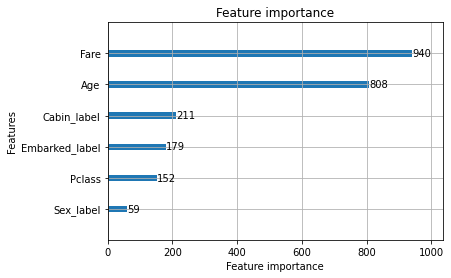

In [12]:
lgb.plot_importance(lgbm_model)

<Figure size 1440x1440 with 0 Axes>

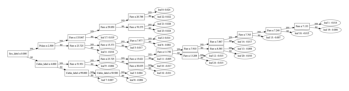

In [25]:
plt.figure(figsize=(20,20))
lgb.plot_tree(lgbm_model, tree_index=10)

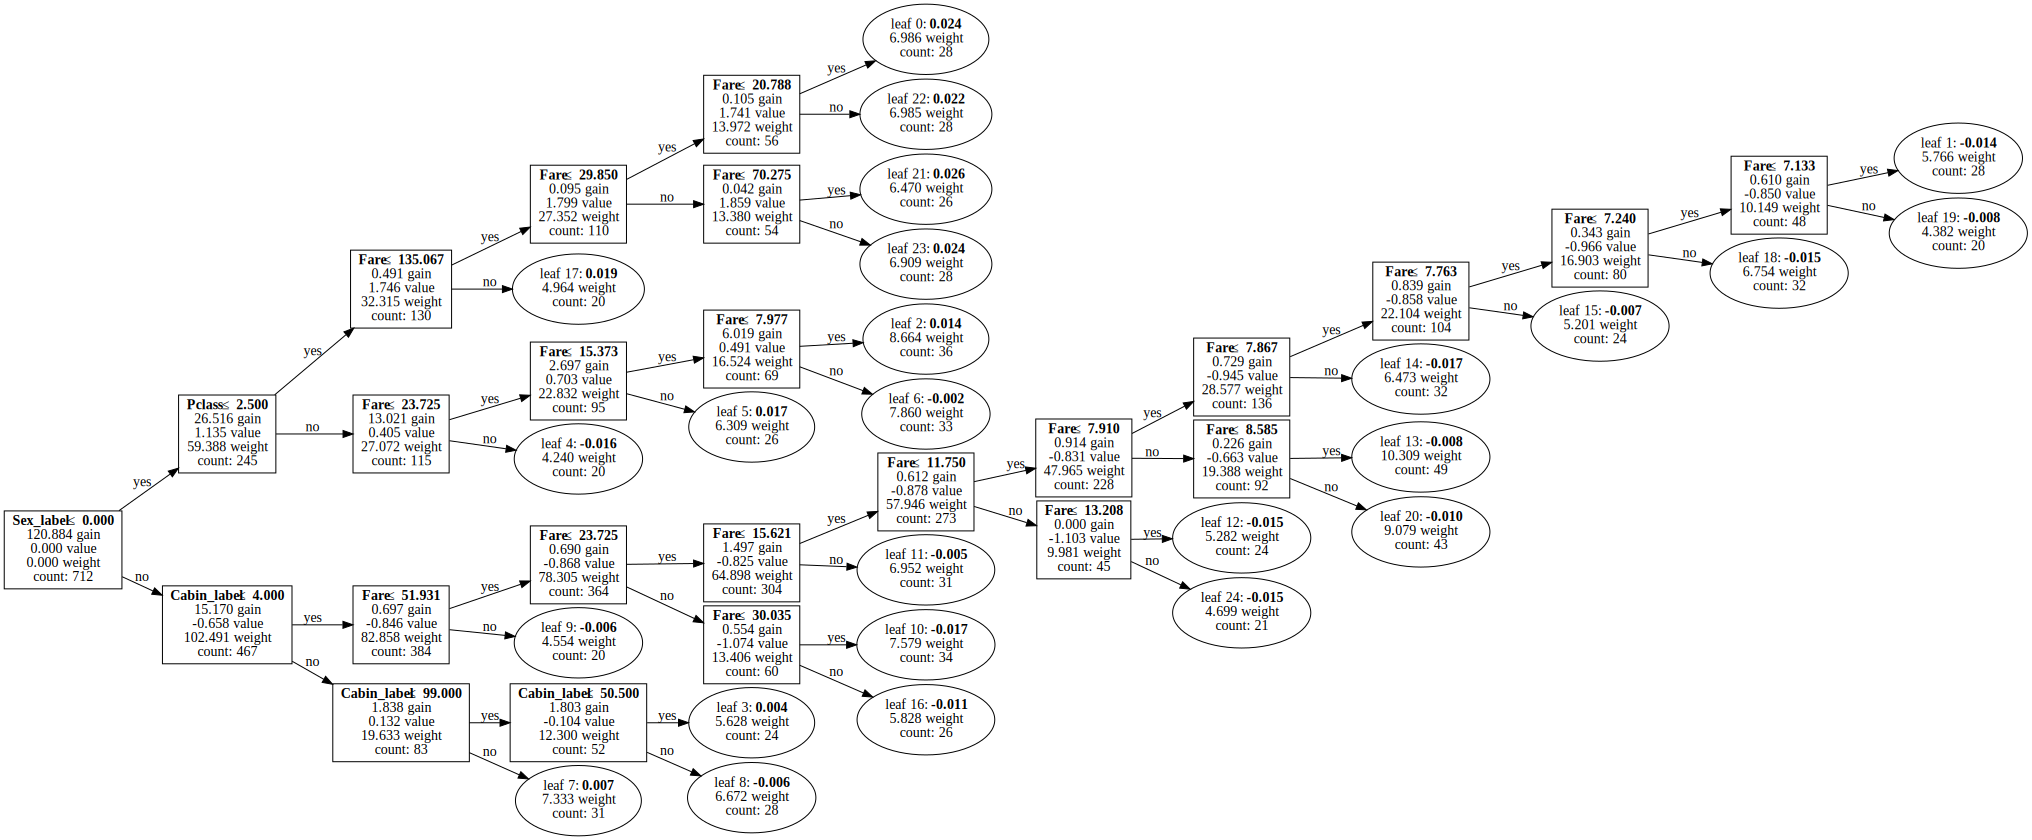

In [26]:
lgb.create_tree_digraph(lgbm_model, tree_index=10, show_info=['split_gain', 'internal_value', 'internal_count', 'internal_weight',
    'leaf_count', 'leaf_weight'])
